<a href="https://colab.research.google.com/github/royam0820/DL/blob/master/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American Sign Language (ASL)

Ref.: https://www.kaggle.com/grassknoted/asl-alphabet
 

The training data set contains 87,000 images which are 200x200 pixels. 

There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING. These 3 classes are very helpful in real time applications, and classification. 

The test data set contains a mere 29 images, to encourage the use of real world test images.

![alt text](https://www.nidcd.nih.gov/sites/default/files/Content%20Images/NIDCD-ASL-hands-2014.jpg)

In [0]:
# Get the fastai libraries and other important stuff: https://course.fast.ai/start_colab.html
!curl -s https://course.fast.ai/setup/colab | bash

In [0]:
import os
from fastai import *
from fastai.vision import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
# checking the fastai version
import fastai; fastai.__version__

'1.0.57'

## Kaggle - Pre-Processing


In [0]:
# installing the Kaggle API
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.5)


In [0]:
# Kaggle security key - json file
# you can complete this info from json file
# !echo '{"username":"USERNAME","key":"API_KEY"}' > /root/.kaggle/kaggle.json
!mkdir /root/.kaggle
!echo '{"username":"royam0829","key":"0b92434a802b99a487e0764fddb56c25"}' > /root/.kaggle/kaggle.json

In [0]:
# file permission to setup to owner can read and write
!chmod 600 /root/.kaggle/kaggle.json

In [19]:
# testing the access to the Kaggle website
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2837           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      11204           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4457           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         50           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       4065           False  
cat-in-the-dat                                 2019-12-09 23:59:00  Playground            Swag        188           False  
understa

### Getting the ASL dataset

In [0]:
# creating a directory : asl
if not os.path.exists('asl'):
    os.makedirs('asl')

In [21]:
# download the Kaggle dataset and unzip the files
!kaggle datasets download -d grassknoted/asl-alphabet -p /content/asl

100% 1.01G/1.01G [00:24<00:00, 36.7MB/s]
100% 1.01G/1.01G [00:24<00:00, 44.7MB/s]


In [22]:
print(os.listdir("../content/asl"))

['export.pkl', 'pred-image.jpg', 'asl-alphabet.zip']


In [25]:
!unzip /content/asl/asl-alphabet.zip -d /content/asl

Archive:  /content/asl/asl-alphabet.zip
  inflating: /content/asl/asl_alphabet_train.zip  
  inflating: /content/asl/asl_alphabet_test.zip  


In [23]:
print(os.listdir("../content/asl"))

['export.pkl', 'pred-image.jpg', 'asl-alphabet.zip']


In [26]:
!unzip /content/asl/asl_alphabet_test.zip -d /content/asl
!unzip /content/asl/asl_alphabet_train.zip -d /content/asl

Archive:  /content/asl/asl_alphabet_test.zip
   creating: /content/asl/asl_alphabet_test/
  inflating: /content/asl/asl_alphabet_test/space_test.jpg  
  inflating: /content/asl/asl_alphabet_test/nothing_test.jpg  
  inflating: /content/asl/asl_alphabet_test/Z_test.jpg  
  inflating: /content/asl/asl_alphabet_test/Y_test.jpg  
  inflating: /content/asl/asl_alphabet_test/X_test.jpg  
  inflating: /content/asl/asl_alphabet_test/W_test.jpg  
  inflating: /content/asl/asl_alphabet_test/V_test.jpg  
  inflating: /content/asl/asl_alphabet_test/U_test.jpg  
  inflating: /content/asl/asl_alphabet_test/T_test.jpg  
  inflating: /content/asl/asl_alphabet_test/S_test.jpg  
  inflating: /content/asl/asl_alphabet_test/R_test.jpg  
  inflating: /content/asl/asl_alphabet_test/Q_test.jpg  
  inflating: /content/asl/asl_alphabet_test/P_test.jpg  
  inflating: /content/asl/asl_alphabet_test/O_test.jpg  
  inflating: /content/asl/asl_alphabet_test/N_test.jpg  
  inflating: /content/asl/asl_alphabet_test/M

In [0]:
bs = 64        # Batch size
size = 128     # Image size - original dataset image size: 220 x 220 px
path = Path("./content/asl/asl_alphabet_train/")   # The path to the 'train' folder you created...

In [0]:
path = Path("../content/asl")

training_path = path/"asl_alphabet_train"
testing_path = path/"asl_alphabet_test"


### Applying Transformations

In [0]:
tfms = get_transforms()

NOTE: `get_transforms()` source code



```
get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None) → Collection[Transform]
```



## Creating the databunch


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, 
                                  train=training_path,
                                  valid_pct=0.2,
                                  test = testing_path,
                                  ds_tfms=get_transforms(), size=size, bs=bs).normalize(imagenet_stats)

In [0]:
# data labels
data.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'asl_alphabet_test',
 'del',
 'nothing',
 'space']

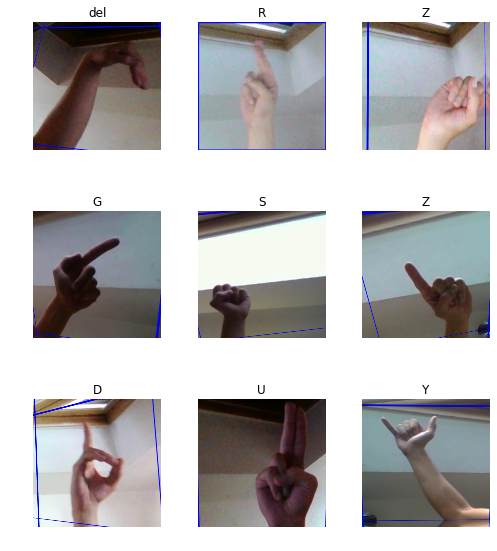

In [0]:
data.show_batch(rows=3, figsize=(7,8))

### Looking at a few examples

(Image (3, 128, 128), Category O)


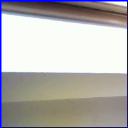

In [0]:
# training data set
print(data.train_ds[10])
data.valid_ds[10][0]

(Image (3, 128, 128), Category U)


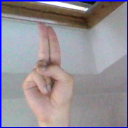

In [0]:
# validation data set
print(data.valid_ds[0])
data.valid_ds[0][0]

### A brief look at important details


In [0]:
data.label_list

LabelLists;

Train: LabelList (69623 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
O,O,O,O,O
Path: ../content/asl;

Valid: LabelList (17405 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
U,space,Y,H,O
Path: ../content/asl;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: ../content/asl

In [0]:
# save the databunch
bs=64
size= 128
data.save('/content/imageDataBunch-bs-'+str(bs)+'-size-'+str(size)+'.pkl')

## Learner - Model ResNet50

In [0]:
learn = cnn_learner(data, models.resnet50, metrics= [accuracy, error_rate], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 82871082.58it/s]


In [0]:
learn.fit_one_cycle(1)

NOTE: the fastai default learning rate = 0.003 or (3e-3).



In [0]:
learn.save('stage-1')
learn.export('stage-1-model')

## Fine-Tuning

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06
Min loss divided by 10: 5.75E-07


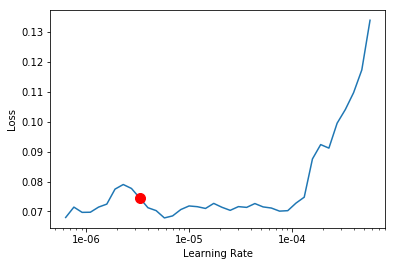

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,3e-3))

In [0]:
learn.save('stage-2')
learn.export("stage-2-model")

## Changing image size to 220px

In [0]:
data = ImageDataBunch.from_folder(path, 
                                  train=training_path,
                                  valid_pct=0.2,
                                  test = testing_path,
                                  ds_tfms=get_transforms(), size=220, num_workers=3, bs=bs).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics= [accuracy, error_rate], model_dir="/tmp/model/").load('stage-2')

In [0]:
#learn.fit_one_cycle(2, max_lr=slice(6e-6,8e-6))
learn.fit_one_cycle(2, max_lr=slice(6e-6,3e-3))

## Exporting the Model


In [0]:
learn.export()

# Inference - Image





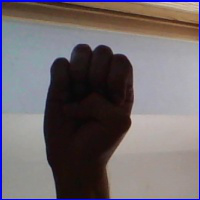

In [0]:
img = open_image('/content/asl/asl_alphabet_test/E_test.jpg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category E

# Inference - Video Recording

[Displaying a video in a Jupyter Notebook](https://github.com/bikz05/ipython-notebooks/blob/master/computer-vision/displaying-video-in-ipython-notebook.ipynb)


The cv2.imshow() and cv.imshow() functions from the opencv-python package are incompatible with Jupyter notebook; see https://github.com/jupyter/notebook/issues/3935.

As a substitution, consider using
```
  from google.colab.patches import cv2_imshow
```


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from fastai.vision import *


### Importing the model

In [0]:
# Importing the model
path = "/content/asl/"  # directory where the export.pkl file is
learn = load_learner(path)


### Testing video capturing - Extracting frames

NOTE: In the ASL sign language, "hi" is composed on 96 frames. I want to extract the first frame (0) and the last frame (90).

In [0]:
# Prediction
def predict(imgpath):
    img = open_image(imgpath)
    pred_class, pred_idx, outputs = learn.predict(img)
    return pred_class

In [37]:
predict('/content/asl/asl_alphabet_test/H_test.jpg')

Category H

In [38]:
predict("/content/asl/asl_alphabet_test/I_test.jpg")

Category I

frame 1


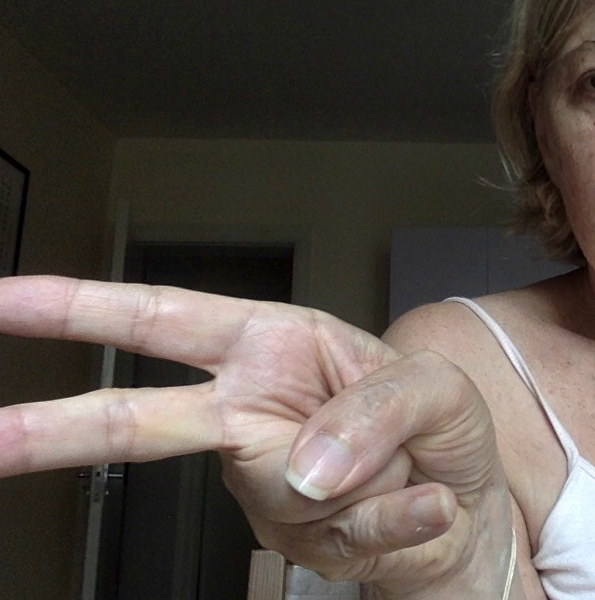

Category: N

frame 95


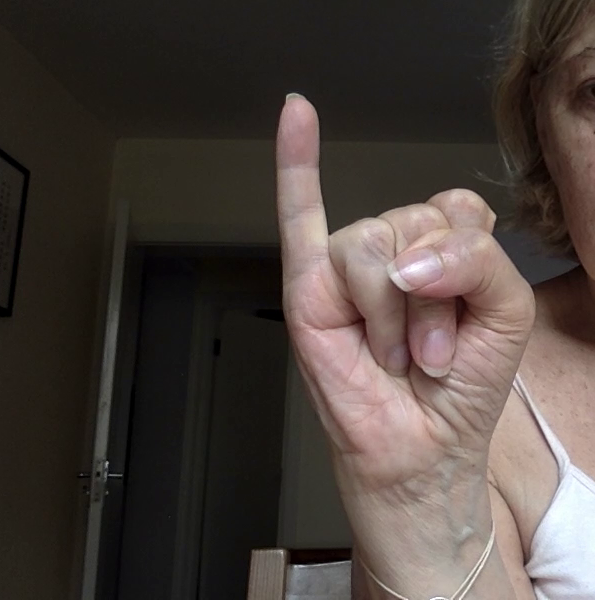

Category: I



In [39]:
# video file - "hi"
video_name = '/content/asl/asl-vid-hi.mov'

# Reading only frames 0 and 95 the last frame
frames = [0, 95]

# reading the video - counting the number of frames
cap = cv2.VideoCapture(video_name)
frames = ['1', '95']

for i in frames:
  print('frame', i)
  cap.set(cv2.CAP_PROP_POS_FRAMES, int(i))
  ret, frame = cap.read()
  
  # Cropping the image (y : y+height, x : x + width )
  crop_img = frame[120:800, 5:600]
  
  
  # show image
  cv2_imshow(crop_img)
  
  # write image
  imgpath = '/content/pred-image.jpg'
  cv2.imwrite(imgpath, crop_img)
  pred = predict(imgpath)
  
  # print the predition
  print('Category:' , pred)
  print()
  

  cv2.waitKey()
  
  
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Inference - Video streaming

Testing the model with a webcam

Ref.: https://medium.com/@neotheicebird/webcam-based-image-processing-in-ipython-notebooks-47c75a022514

Another example, using the webcam

https://towardsdatascience.com/from-raw-images-to-real-time-predictions-with-deep-learning-ddbbda1be0e4



The stack consists of :

- `Matplotlib` to show the image,
- `pyopencv` to access webcam
- `IPython.display` to clear and redraw static images in a cell.

In [0]:
%matplotlib notebook

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import matplotlib.pyplot as plt
import signal
from fastai.vision import *


### Importing the model

In [0]:
# Importing the model
path = "/content/asl/"  # directory where the export.pkl file is
learn = load_learner(path)


## Predictions

In [0]:

# Predict the image
def predict(imgpath):
    img = open_image(imgpath)
    pred_class, pred_idx, outputs = learn.predict(img)
    return pred_class

In [27]:
predict("/content/asl/asl_alphabet_test/H_test.jpg")

Category H

# Web Live Streaming

Opening a live video frame to test the model.

Issues with the webcam in a Jupyter Notebook.

In [0]:
def webcam_stream():

    # Initialize fps to 0
    fps = 0

    # Initialize prediction string, title and help text
    prediction = ''
    title = 'ASL Classification'
    help_text = 'Press R to Reset Text or Q to quit'

    # Run till exit key not pressed - this will capture a video from the webcam
    while True:
        # Capture each frame
        ret, frame = cap.read()

        if fps >=25:  # This needs to be adjusted, currently too fast for a user to change sign without garbage characters being added in between
            image = frame[50:300, 50:300]
            cv2.imwrite('pred-image.jpg', image)
            pred = predict(imgpath)
            temp = str(pred)
            if temp == "space":
                prediction += " "
            elif temp == "del":
                prediction = prediction[:-1]
            elif temp == "nothing":
                prediction += ""
            else:
                prediction += temp
            fps = 0

        fps += 1

        # Display Title
        cv2.putText(frame, title, (180, 30), font,
                    1, (0, 0, 0), 2, cv2.LINE_AA)

        # Display the prediction underneath the region of interest
        cv2.putText(frame, prediction, (50, 400), font,
                    2, (255, 255, 255), 2, cv2.LINE_AA)

        # Display Help text on the bottom
        cv2.putText(frame, help_text, (60, 450), font,
                    1, (0, 255, 0), 2, cv2.LINE_AA)

        # Draw the region of interest and name the video capture window
        cv2.rectangle(frame, (50, 50), (300, 300), (250, 0, 0), 2)
        #cv2.imshow("ASL Prediction", frame)
        cv2_imshow(imgpath)

        # Reset text when r is pressed, exit when q is pressed
        key = cv2.waitKey(1)
        if key == ord('r'):
            prediction = ""
        elif key == ord('q'):
            break

### Error - cannot open a video frame 

```
# Set the WebCam and its frame
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

```

The above line of code returns False.


In [48]:
# Set the WebCam and its frame
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

False

In [46]:
# Change these paths to fit your system
path = Path("../content/asl")
imgpath = path/"asl_alphabet_test/U_test.jpg"


# Set the WebCam and its frame
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# Set Font
font = cv2.FONT_HERSHEY_SIMPLEX

# Streaming the video            
webcam_stream()
# Release and destroy the window after exiting the loop
cap.release()
cv2.destroyWindow("ASL Prediction")


AttributeError: ignored